## Best Classifier to predict loan case will paid off or not

## Import required library

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

import os
%matplotlib inline

import pylab as pl
import scipy.optimize as opt

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20181023021615-0005


## Loading loan data 

In [85]:
# The code was removed by Watson Studio for sharing.

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20,0,669560,1021460.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0


In [3]:
df.shape

(100000, 19)

In [4]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## Drop those datapoints which contain NaN

In [5]:
df =df.dropna()
df.head()
df.shape

(36423, 19)

In [6]:
df['Loan Status'].value_counts()

Fully Paid     28972
Charged Off     7451
Name: Loan Status, dtype: int64

## Selecting the best feature

In [7]:
x=df[['Current Loan Amount', 'Credit Score', 'Annual Income','Monthly Debt','Months since last delinquent','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Maximum Open Credit','Current Credit Balance','Bankruptcies','Tax Liens']].values
x.shape
x[0:5]


array([[  9.99999990e+07,   7.41000000e+02,   2.23189200e+06,
          2.92005300e+04,   2.90000000e+01,   1.49000000e+01,
          1.80000000e+01,   1.00000000e+00,   7.50090000e+05,
          2.97996000e+05,   0.00000000e+00,   0.00000000e+00],
       [  2.17646000e+05,   7.30000000e+02,   1.18419400e+06,
          1.08550800e+04,   1.00000000e+01,   1.96000000e+01,
          1.30000000e+01,   1.00000000e+00,   2.72052000e+05,
          1.22170000e+05,   1.00000000e+00,   0.00000000e+00],
       [  5.48746000e+05,   6.78000000e+02,   2.55911000e+06,
          1.86602800e+04,   3.30000000e+01,   2.26000000e+01,
          4.00000000e+00,   0.00000000e+00,   5.55038000e+05,
          4.37171000e+05,   0.00000000e+00,   0.00000000e+00],
       [  9.99999990e+07,   7.28000000e+02,   7.14628000e+05,
          1.18510600e+04,   7.60000000e+01,   1.60000000e+01,
          1.60000000e+01,   0.00000000e+00,   2.89784000e+05,
          2.03965000e+05,   0.00000000e+00,   0.00000000e+00],
    

In [8]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn import metrics
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

Loan_Status= encode_text_index(df,"Loan Status")

## Encoding is done for target variable (Loan Status) as 1 is assign to Fully Paid and 0 is assigned to Charged off

In [9]:
y=df['Loan Status'].values
y[0:10]



array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

## Normalize Loan data

In [10]:
x= preprocessing.StandardScaler().fit(x).transform(x.astype(float))


## Splitting the data into train and test

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (27317, 12) (27317,)
Test set: (9106, 12) (9106,)


## Use KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

## Training 

In [86]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

## Predicting

In [87]:
# test The Model
yhat = neigh.predict(x_test)
yhat

array([1, 0, 1, ..., 1, 0, 1])

In [88]:
# test The Model
yhat_prob = neigh.predict_proba(x_test)
yhat_prob

array([[ 0.25,  0.75],
       [ 0.75,  0.25],
       [ 0.  ,  1.  ],
       ..., 
       [ 0.  ,  1.  ],
       [ 0.5 ,  0.5 ],
       [ 0.  ,  1.  ]])

## Performance Evaluation

In [89]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.864004100011
Test set Accuracy:  0.776301339776


## Jaccard Index

In [90]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.77630133977597193

## Confusion Matrix

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[6313  912]
 [1125  756]]


Confusion matrix, without normalization
[[6313  912]
 [1125  756]]


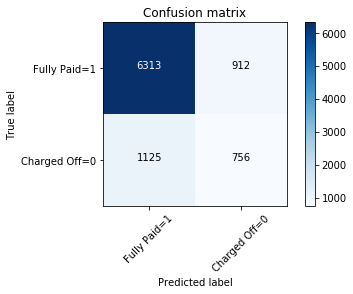

In [93]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fully Paid=1','Charged Off=0'],normalize= False,  title='Confusion matrix')

In [94]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.45      0.40      0.43      1881
          1       0.85      0.87      0.86      7225

avg / total       0.77      0.78      0.77      9106



## Log Loss

In [95]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

2.4732164379662782

## Using Decision Tree As A Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [98]:
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
predTree = drugTree.predict(x_test)
predTree_prob =drugTree.predict_proba(x_test)

In [117]:
print (predTree [0:100])
print (y_test [0:100])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1]


In [118]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predTree)

0.84636503404348784

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predTree, labels=[1,0]))

[[7225    0]
 [1399  482]]


Confusion matrix, without normalization
[[7225    0]
 [1399  482]]


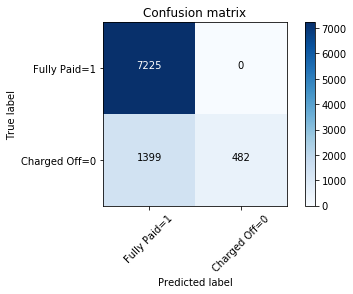

In [121]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fully Paid=1','Charged Off=0'],normalize= False,  title='Confusion matrix')

In [122]:
print (classification_report(y_test, predTree))

             precision    recall  f1-score   support

          0       1.00      0.26      0.41      1881
          1       0.84      1.00      0.91      7225

avg / total       0.87      0.85      0.81      9106



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, predTree_prob)

In [ ]:
## Use SVM as a Classifier